# Descriptive Statistics

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, f, t, chi2, skewnorm, kurtosis, chi2_contingency, entropy
from sklearn.metrics import confusion_matrix

Describing the charistiaristics of a datatset

We don't care about generalizations or comparisons to other datasets. We only care about describing what happens in this dataset. What's the mean, what's the variance, is it skewed, etc.

# True/False Positive/Negative

TP - The model truthly said the label is positive.

TN - The model truthly said the label is negative.

FP - The model wrongly said the label is positive.

FN - The model wrognly said the label is negative.

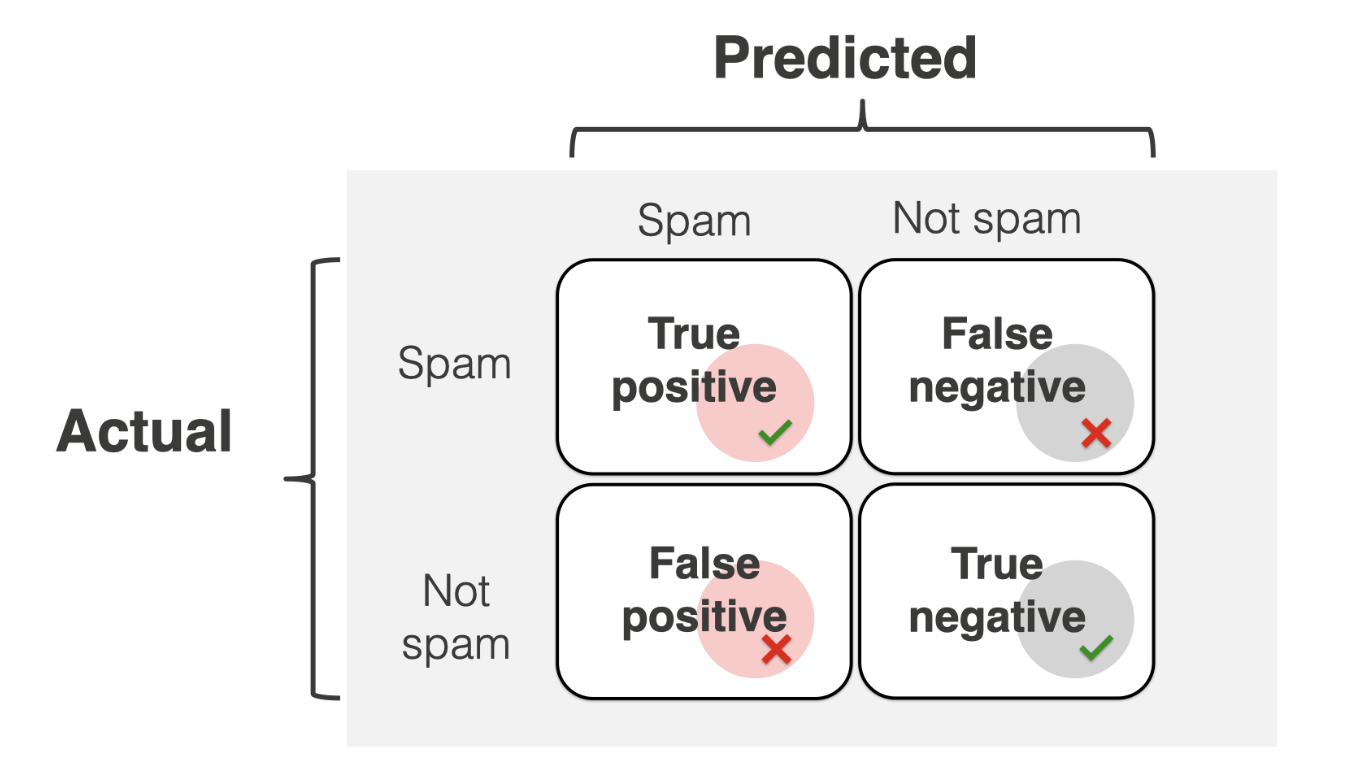

Source: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20is%20a%20metric%20that,often%20the%20model%20is%20right%3F

# Accuracy vs Precision vs Recall

## Accuracy
$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}
{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

Accuracy - the relationship between the measurement and the actual truth. Useful for predictions. How many times did we hit the target? How far were we?

### Question

In what scenario can accuracy fail us as an accuracy measurement? 

### Answer:

When the labels are imbalanced.

Let's say I want to predict if there is going to be an earthquake tomorrow. 99.999% of the time, there isn't. All the model has to do is say there will never be (negative all the time) and it will be accurate 99.999% of the time.

## Precision

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

Precision measures how often we correctly predict the positive class. In other words, given I predicted positive, is it true?

For example: out of all the transactions I flagged as fraud, how many were actual fraud?

Precision is a great measurement when we don't want to be wrong. If I say something is true, it better be. For example, recruiting. It's expensive to pass on good people, but it's WAY more expensive to hire the wrong person. I'm willing to miss out on good people as long as when I say I found who I'm looking for, it is spot on.

## Recall
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

Recall - a.k.a sensitivity/true positive. Recall measures the real positive classes that were identified. For example, out of all the spam emails, how many did I identify?

Recall is useful where the cost of missing the right match is high. For example medical treatment, if someone has cancer, you want to know. The downside of Recall is that it doesn't care about false positive (e.g. being wrong)

Precision and Recall usually have a negative correlation. Why? 
Say I want to increase the Precision, what do I do? Raise the bar. I now need to be extra sure that if I say something is true, it's actually true. If I'm more careful, it means I probably miss more, missing is a False Negative. Increasing False Negatives, decreases recall.

## Question

What is the difference between the formulas of Precision & Recall? What can we learn from it?

### Solution

The only difference is the second item in the denominator. Precision punishes the measurement for False Positive, e.g. saying something is positive when it's not. Recall does the same but for False Negatives. Saying something is negatives when it's not.

## Exercises

### Exercise

Which scenario fits which measurement?

1. True story - I'm a VC fund representative, I want to find as many suitable for investments startups as I can, so I can pick the best ones. I can afford to waste time, I don't want to miss on good opportunities. I need to decide which do I want to speak with. What measurement should I care about?

2. True story - I'm a VC fund representative, I need to recommend which startups should be up for investment. It's more important for me to only recommend the right ones than to miss out on some. Which measurement should I use?

3. True story - I'm predicting whose going to win in a soccer game. I'm giving advices to people, so I want to be as right as I can. Which measurement should I use?

#### Solutions

1 - Recall

2 - Precision

3 - Accuracy

### Exercise

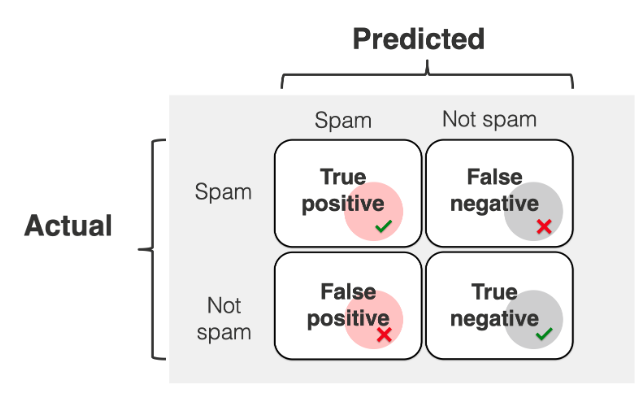

Source: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20is%20a%20metric%20that,often%20the%20model%20is%20right%3F

Given y_true and y_pred arrays, write a between 1 and 4 functions (your choice) to calculate the TP, TN, FP, FN for the dataset

Hint: True is where the prediction and label match. False is where they dont match

In [2]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
y_pred = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

#### Solution

In [4]:
def calculate_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = np.sum((y_pred == 1) & (y_true == 1))
    
    FP = np.sum((y_pred == 1) & (y_true == 0))
    
    TN = np.sum((y_pred == 0) & (y_true == 0))
    
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    
    
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    return TP
    
    return {
        'Precision': precision,
        'Accuracy': accuracy,
        'Recall': recall,
    }


metrics = calculate_metrics(y_true, y_pred)
# print(f"Precision: {metrics['Precision']:.2f}")
# print(f"Accuracy: {metrics['Accuracy']:.2f}")
# print(f"Recall: {metrics['Recall']:.2f}")


In [5]:
y_pred

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [6]:
metrics

3

### Exercise

Use scikit-learn's confusion matrix. Its rather simple.

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [8]:
def plot_cm(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    thresh = cm.max() / 2.

    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

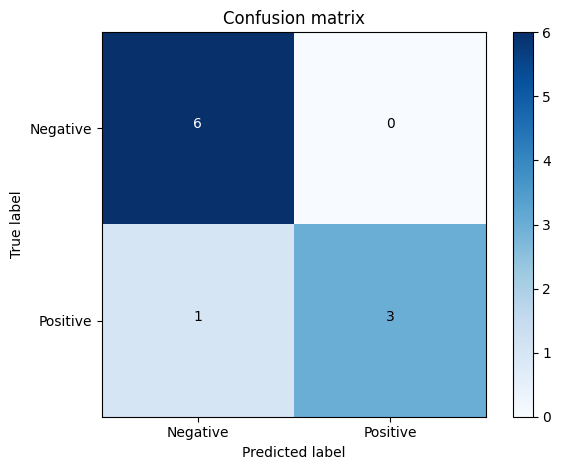

In [9]:
plot_cm(cm)

# Data Types

Let's now learn what are the statistical data types and how they differ. Each datatype requires a different kind of treatment both statistically and visually and therefor it makes sense to understand the differences.

## Nominal data

Nominal - categories with no particular order. For example gender, martial status.

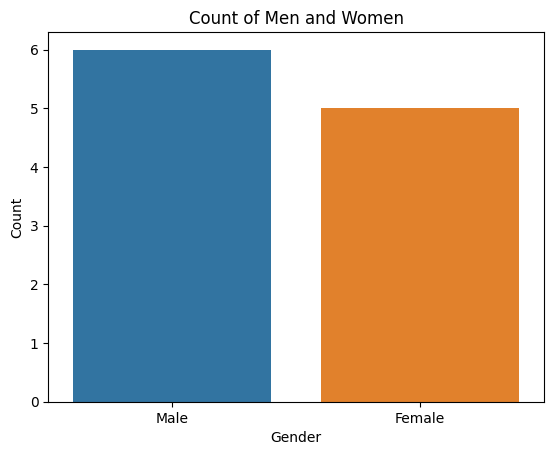

In [10]:
gender_data = ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female']

sns.countplot(x=gender_data)
plt.title('Count of Men and Women')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Question

Can you think of a data type that is categorized but is NOT nominal? (e.g. order <b> does </b> matter?

## Ordinal

Ordinal - Defined categories with natural order or hierarchy. For example B.Sc., M.Sc., PhD

Statistical Analysis: Median, percentile, non-parametric tests (e.g., Mann-Whitney U test, Kruskal-Wallis test).
Data Visualization: Bar charts, box plots.
Data Interpretation: Categories have a natural order, but the intervals between categories may not be equal. Analysis considers the order of categories but does not assume equal intervals between them.

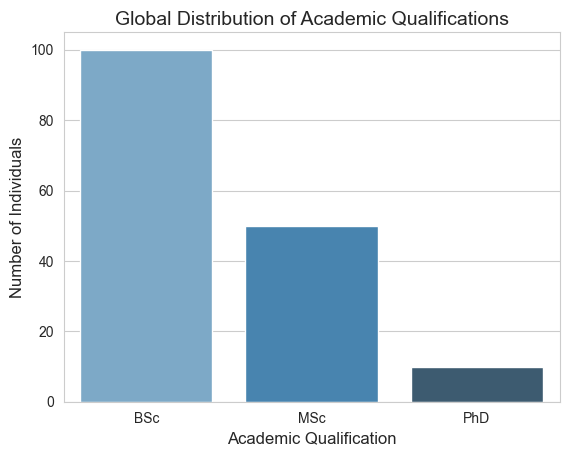

In [11]:
labels = ['BSc', 'MSc', 'PhD']
values = [100, 50, 10]

sns.set_style("whitegrid")

sns.barplot(x=labels, y=values, palette="Blues_d")

plt.xlabel('Academic Qualification', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.title('Global Distribution of Academic Qualifications', fontsize=14)
plt.show()

## Interval

Interval -  data where the difference between two valeus is meanignful, but 0 does not mean NO value. For example temperature. 

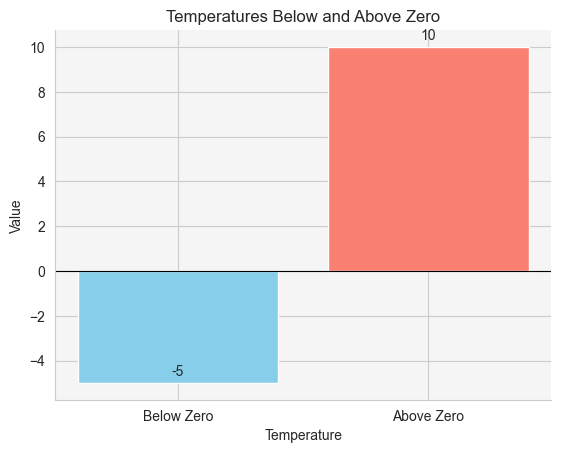

In [12]:
temperatures = [-5, 10]
labels = ['Below Zero', 'Above Zero']

fig, ax = plt.subplots()
index = np.arange(len(temperatures))
bars = ax.bar(index, temperatures, color=['skyblue', 'salmon'])

ax.set_xlabel('Temperature')
ax.set_ylabel('Value')
ax.set_title('Temperatures Below and Above Zero')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.axhline(0, color='black', linewidth=0.8)  

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_facecolor('whitesmoke')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Ratio

Ratio - Same as interval but this time zero means the absence of the value, for example length, height, etc.

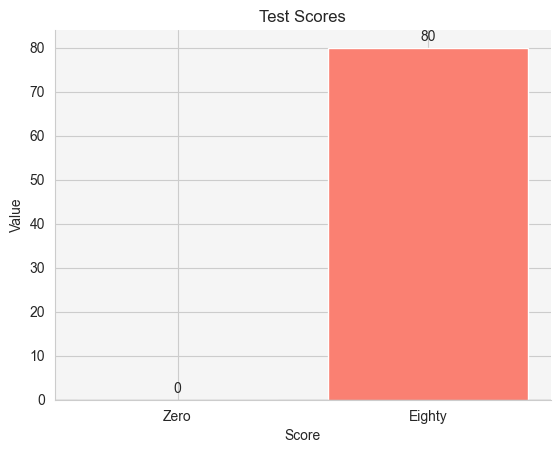

In [13]:
scores = [0, 80]
labels = ['Zero', 'Eighty']

fig, ax = plt.subplots()
index = np.arange(len(scores))
bars = ax.bar(index, scores, color=['skyblue', 'salmon'])

ax.set_xlabel('Score')
ax.set_ylabel('Value')
ax.set_title('Test Scores')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.axhline(0, color='black', linewidth=0.8)  # Add horizontal line at zero

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_facecolor('whitesmoke')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Discrete

Discrete - data that can take specific values and cannot be divided further. For example, number of children, number of goals scored, etc.

## Continuous

Continuous - data that can take any value within in range. For example, height, weight, money.

## Exercise

Write a class that recognizes the following datatypes:
1. Ratio
2. Interval
3. Nominal
4. Ordinal

The class should receive an example as input and return the correct datatype as output. 

* Note - on some datatypes, such as ordinal its impossible to match all cases. Feel free to only handle a subset, one specific example.

#### Solution

In [20]:
class DataTypeRecognizer:
    
    def __init__(self, data):
        self.data = data

    def recognize(self):
        if self.is_nominal():
            return "Nominal"
        elif self.is_ordinal():
            return "Ordinal"
        elif self.is_interval_or_ratio():
            res = self.is_interval_or_ratio()
            return res
        else:
            return "Unknown"

    def is_nominal(self):
        try:
            has_order = self.data['has_order']
            return all(isinstance(item, str) for item in self.data['data']) and has_order is False
        except Exception:
            pass

    def is_ordinal(self):
        try:
            predefined_ordinals = [
                ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'],
                ['S', 'M', 'L', 'XL'],
            ]
            return any(set(self.data).issubset(set(ordinal)) for ordinal in predefined_ordinals)
        except Exception:
            pass

    def is_interval_or_ratio(self):
        try:
            zero_has_meaning = self.data['can_have_zero_value']
            all_instances_int_or_float = all(isinstance(item, (int, float)) for item in self.data['data'])
            if all_instances_int_or_float and zero_has_meaning is True:
                return 'Interval'
            if all_instances_int_or_float and zero_has_meaning is not True:
                return 'Ratio'
        except Exception:
            pass

In [26]:
examples = [
{'has_order': False, 'data': ["New York", "Los Angeles", "Chicago", "Houston"]}, # nominal
{'has_order': True, 'data': ["New York", "Los Angeles", "Chicago", "Houston"]}, # nominal
["S", "M", "L"], # ordinal
["S", "M", "L", "XL1"], # ordinal
{'can_have_zero_value': True, 'data': [-10, 0, 10, 20, 30]}, # interval 
{'can_have_zero_value': True, 'data': [-10, 0, 10, 20,'30']}, # interval 
{'can_have_zero_value': False, 'data': [-10, 0, 10, 20, 30]}, # Ratio     
]

for example in examples:
    recognizer = DataTypeRecognizer(example)
    data_type = recognizer.recognize()
    print(f"Data: {example} -> Data Type: {data_type}")

Data: {'has_order': False, 'data': ['New York', 'Los Angeles', 'Chicago', 'Houston']} -> Data Type: Nominal
Data: {'has_order': True, 'data': ['New York', 'Los Angeles', 'Chicago', 'Houston']} -> Data Type: Unknown
Data: ['S', 'M', 'L'] -> Data Type: Ordinal
Data: ['S', 'M', 'L', 'XL1'] -> Data Type: Unknown
Data: {'can_have_zero_value': True, 'data': [-10, 0, 10, 20, 30]} -> Data Type: Interval
Data: {'can_have_zero_value': True, 'data': [-10, 0, 10, 20, '30']} -> Data Type: Unknown
Data: {'can_have_zero_value': False, 'data': [-10, 0, 10, 20, 30]} -> Data Type: Ratio


# Disbtributions

Distributions help us understand how the data look and behaves. How it reacts to different conditions.

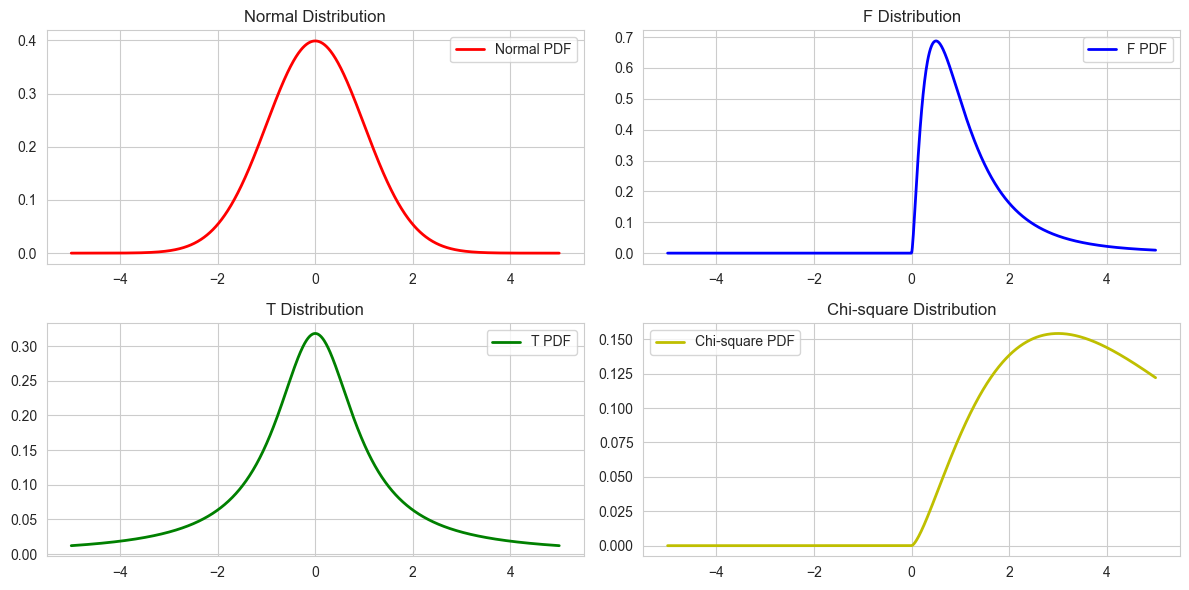

In [16]:
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', lw=2, label='Normal PDF')
plt.title('Normal Distribution')
plt.legend()

plt.subplot(2, 2, 2)
dfn, dfd = 5, 10  
plt.plot(x, f.pdf(x, dfn, dfd), 'b-', lw=2, label='F PDF')
plt.title('F Distribution')
plt.legend()

plt.subplot(2, 2, 3)
df = 1
plt.plot(x, t.pdf(x, df), 'g-', lw=2, label='T PDF')
plt.title('T Distribution')
plt.legend()


plt.subplot(2, 2, 4)
df = 5 
plt.plot(x, chi2.pdf(x, df), 'y-', lw=2, label='Chi-square PDF')
plt.title('Chi-square Distribution')
plt.legend()

plt.tight_layout()
plt.show()

Why should I care how the data distributes? Because the statistical procedure, the tool we use (F/T Test for example) is based on the distribution.

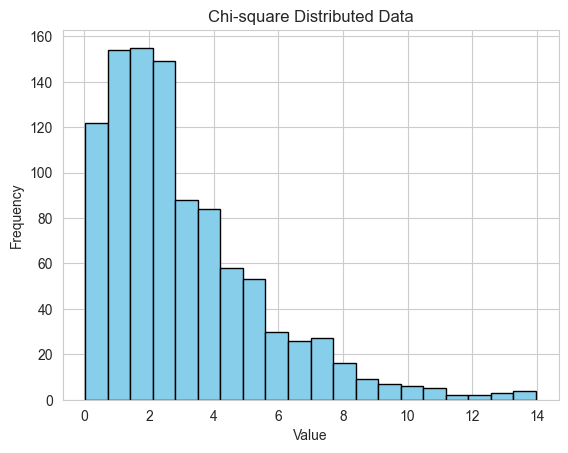

In [17]:
np.random.seed(42)
data_chi2 = np.random.chisquare(df=3, size=1000)  # Generate 1000 samples

plt.hist(data_chi2, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-square Distributed Data')
plt.show()


In [18]:
data = np.array([[30, 10], [15, 25], [5, 15]])  # Frequencies of cars by color and test result

chi2_stat, p_val, dof, expected = chi2_contingency(data)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square statistic: 17.5
P-value: 0.00015846132511575128
Degrees of freedom: 2
Expected frequencies:
 [[20. 20.]
 [20. 20.]
 [10. 10.]]


In [29]:
observed_normal = np.random.normal(loc=0, scale=1, size=(2, 2))  # 2x2 contingency table
chi2_stat_normal, p_val_normal, _, _ = chi2_contingency(observed_normal)

print("\nChi-square statistic for normal data:", chi2_stat_normal)
print("P-value for normal data:", p_val_normal)

ValueError: All values in `observed` must be nonnegative.

In [23]:
observed_f = np.random.f(dfnum=3, dfden=3, size=(2, 2))  # 2x2 contingency table

chi2_stat_f, p_val_f, _, _ = chi2_contingency(observed_f)

print("\nChi-square statistic for F-distributed data:", chi2_stat_f)
print("P-value for F-distributed data:", p_val_f)


Chi-square statistic for F-distributed data: 0.0
P-value for F-distributed data: 1.0


### The Most Important Distribution - The Normal Disbitrubiton

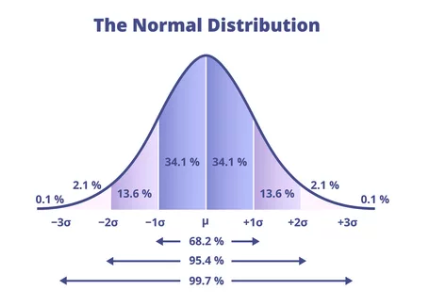

If we take enough samples out of random things, what ever it is, and plot them, we'll see they distribute like a Gaussian distribution. For example, if we measure life expectancy, how tall are people, how fast they drive, how many minutes they talk in their lives, etc. 

Do you remember the name of the rule that describes this phenomena?

Examples of normal distributions in nature.

https://www.statology.org/example-of-normal-distribution/

# Central Tendency - Making General Sense of The Data

### Mean

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

Mean is great for data that distributes normally or somewhat normally. It's bad for other distributions.

In [ ]:
mu1, sigma1 = 0, 1  
mu2_1, mu2_2, sigma2_1, sigma2_2 = -2, 2, 0.5, 0.5  

data_unimodal = np.random.normal(mu1, sigma1, 1000)

data_bimodal = np.concatenate([np.random.normal(mu2_1, sigma2_1, 500), np.random.normal(mu2_2, sigma2_2, 500)])

mean_bimodal = np.mean(data_bimodal)

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_unimodal, kde=True, color='g')
plt.axvline(x=mu1, color='r', linestyle='--', label='Mean')
plt.title('Unimodal Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data_bimodal, kde=True, color='b')
plt.axvline(x=mu2_1, color='r', linestyle='--', label='Mean 1')
plt.axvline(x=mu2_2, color='r', linestyle='--', label='Mean 2')
plt.axvline(x=mean_bimodal, color='g', linestyle='--', label='Mean of means')
plt.title('Bimodal Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Mean is great for Ratio (2 glasses of water for every cup of flour, and Intervals data types).

Why not for other values? Because it might be confusing. For example, let's say that in a given class, 1.6 people are geniuses. Does that mean I should expect to find a 0.6 person? I dont. But does this mean the mean is useless? It isn't. We might still conclude something important on the ratio of geniuses in the class, we just can't take the mean and interpret it as it is.

Let's look at a better example using nominal data. There are 3 levels of degrees in academia. B.Sc., M.Sc., PhD. I want to calculate the average, so I assign numbers to the degrees. B.Sc. = 1, M.Sc. = 2, PhD = 3. 
I get that the average degree in the country is 1.3. Does that mean the average person has a full B.Sc. and 30% of an M.Sc.? If the mean would be 2, would it mean the person is exactly in the middle between B.Sc. and PhD? It would in some senses (she has done one degree, she needs to do another to get a PhD). But is that what we were originally asking about? As you see, the interpretation of the result becomes complicated. It's not like: the average salary in banking is 20k ILS.

Let's take the same example to a different world. There are 3 positions in my team, Data scientist, Bookkeeper and a sound man. I give the positions numbers 1,2,3. The average is 2.75. Does that mean this person is mostly a sound man, but is some bookkeeper? What does it even mean? There is no link between the different labels, hence it doesn't make sense to take a mean.

It makes perfect sense to use mean for interval and ratio data. It makes some sense to use it for discrete and ordinal data, but we must interpret the results carefully. Furthermore, it makes no sense whatsoever to use it for nominal data.

This doesn't mean you should memorize each measurement and to what data type it belongs, it means you need to think if the test you're applying makes sense for the particular use case.

### Median

if n is odd:

$$
median = X[\frac{n+1}{2}]
$$

if n is even:
$$
median = X[\frac{n}2] + X[\frac{n}2 + 1]
$$

X is the list of values in the dataset

n = number of values in the dataset

The median indicates where the data is mostly clustered, hence it only makes sense to use in unimodal distributions. The median, unlike the mean, is not sensitive to outliers.

In [ ]:
data_right_skewed = np.random.gamma(shape=0.5, scale=1, size=1000)

mean_right_skewed = np.mean(data_right_skewed)
median_right_skewed = np.median(data_right_skewed)

sns.histplot(data_right_skewed, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_right_skewed, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_right_skewed, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.title('Right-skewed Distribution with Mean and Median Lines')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
data_mode1 = np.random.normal(loc=-2, scale=1, size=1000)

data_mode2 = np.random.normal(loc=2, scale=1, size=1000)

data_bimodal = np.concatenate([data_mode1, data_mode2])

mean_bimodal = np.mean(data_bimodal)
median_bimodal = np.median(data_bimodal)

sns.histplot(data_bimodal, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_bimodal, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_bimodal, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.title('Bimodal Distribution with Mean and Median Lines')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In a normal distribution, both the mean and median are the same

In [ ]:
data_normal = np.random.normal(loc=0, scale=1, size=1000)

mean_normal = np.mean(data_normal)
median_normal = np.median(data_normal)

sns.histplot(data_normal, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_normal, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_normal, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.title('Normal Distribution with Mean and Median Lines')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### Mode

The most frequent value in the data. Its great for skwewed distributions, or for nominal data where there is no actual order. 

In [ ]:
classes = ['La Liga', 'World cup', 'Zimbabwe Premier', "Ligat ha'Al"]
frequencies = [1500, 200, 150, 100]  

plt.figure(figsize=(10, 6))
plt.bar(classes, frequencies, color='skyblue')

plt.xlabel('Sports')
plt.ylabel('Frequency')
plt.title('Frequency of leagues Participation')

plt.show()

# Dispersion 

### Variance & Standard Deviation

Dispersion - a measure of how scattered the data is around the mean. 

Here we see a formula for calculating the variance.

$$
\sigma^2 = \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


In this formula, we do 2 operations:

1. We reduce the mean so we are not dependent on the scale of the data
2. We raise to the power of 2 the result of article 1. If we wouldn't do anything, the variance would always be zero because we reduce the mean. Why power of 2? Because it's easier to work with these numbers. Firstly it increases the variance for larger values, the bigger the gap, the MUCH bigger the difference. In addition, squaring has some nice properties. For example, if we would use an absolute value instead of raising to the power of 2 we might get a non-continuous function which is more difficult to optimize.

Which plot has a higher variance?

In [ ]:
data_normal = np.random.normal(loc=0, scale=1, size=10000)

data_high_variance = np.random.exponential(scale=10, size=10000)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_normal, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.histplot(data_high_variance, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
np.var(data_normal), np.var(data_high_variance)

# Statistical Moments

Statistical moments describe a distribution's properties such as its center, skewness, spread and more.

$$
m_k = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^k
$$

First moment = mean

$$
m_1 = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Second moment = variance

$$
m_2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Third moment = skweness

$$
m_3 = \frac{1}{n\sigma^3} \sum_{i=1}^{N} (x_i - \bar{x})^3
$$


Fourth moment = Kurtosis

$$
m_4 = \frac{1}{n\sigma^4} \sum_{i=1}^{N} (x_i - \bar{x})^4
$$


Kurtosis is the size of the tail. The bigger it is, the higher the value.

In [ ]:
right_skewed_data2 = np.random.gamma(1, size=1000)

sns.set_style("darkgrid") 

plt.figure(figsize=(10, 6))

sns.displot(right_skewed_data2, color="salmon", kde=True, label="Right Skewed (Lower Skew)", alpha=0.7)

plt.legend()
plt.tight_layout()

plt.show()

kurtosis_val = kurtosis(right_skewed_data2)
# print(kurtosis_val)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
data = skewnorm.rvs(size=1000, a=5)
sns.distplot(np.log(data), ax=ax)

kurtosis_val = kurtosis(data)
# print(kurtosis_val)

In [ ]:
high_kurtosis_data = np.random.laplace(loc=0, scale=1, size=1000)
low_kurtosis_data = np.random.uniform(low=-1, high=1, size=1000)
high_kurtosis_value = kurtosis(high_kurtosis_data)
low_kurtosis_value = kurtosis(low_kurtosis_data)

sns.set_style("darkgrid")

sns.displot(high_kurtosis_data, ax=ax1, color="skyblue", kde=True, label="High Kurtosis")
ax1.set_title(f"Distribution with High Kurtosis ({high_kurtosis_value:.2f})")
ax1.legend()

sns.displot(low_kurtosis_data, ax=ax2, color="salmon", kde=True, label="Low Kurtosis")
ax2.set_title(f"Distribution with Low Kurtosis ({low_kurtosis_value:.2f})")
ax2.legend()

plt.tight_layout()

plt.show()

print('high kurtosis', high_kurtosis_value)
print('low kurtosis', low_kurtosis_value)

# Entropy

$$
H(X) = - \sum_{i=1}^{n} P(x_i) \log_2(P(x_i))
$$


Entropy is a measurement for the uncertainty of a distribution. The more certainty there is, the less entropy.

For example, if I flip a fake coin that always shows head, I have 100% certainty and hence 0 entropy. If I do something in complete random, I have full entropy.

Compared to variance, which is affected by the mean, entropy is less volatile in this regard.

It's used in algorithms like CART to decide on the best criterion to divide upon and in dimensionality reduction methods to decide which data is less important.

In [ ]:
data_high_entropy = np.random.rand(1000)

data_low_entropy = [1, 2, 3]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_high_entropy, bins=30, color='skyblue', edgecolor='black')
plt.title('High Entropy Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_low_entropy, bins=30, color='salmon', edgecolor='black')
plt.title('Low Entropy Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

entropy_high = entropy(data_high_entropy, base=2)
entropy_low = entropy(data_low_entropy, base=2)

print(f"Entropy of high entropy data: {entropy_high}")
print(f"Entropy of low entropy data: {entropy_low}")


# Titanic EDA

The EDA will consist out of 2 parts:
1. Mapping all columns to their respective data types. Use your own data types matcher, if it doesn't work, fix it. Make sure you get the result you expect. 

* Note, you might have to transform the data that comes out of Titanic.

2. Hard-core EDA. Try to get as many insights as you can from the data. Write a summary of what you understand, make sure to have everything backed by your analysis.

In [34]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

1. PassengerId: Nominal
2. Survived: 
3. Pclass: Ordinal 
4. Name: Nominal 
5. Sex: Nominal 
6. Age: Interval 
7. SibSp: Ratio 
8. Parch: Ratio 
9. Ticket: Nominal 
10. Fare: Ratio 
11. Cabin: Nominal
12. Embarked: Nominal 